In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
from scipy.stats import multivariate_normal
import scipy
import math
from numpy.linalg import det
import pandas as pd

$2)$

In [42]:
N = 100

liste_echantillons = np.random.randn(N)*np.sqrt(4) + 3

#print(liste_echantillons)
print(np.mean(liste_echantillons))
print(np.cov(liste_echantillons))

2.835925329304508
4.819298658299632


Plus on augmente N, plus la moyenne et la variance se rapprochent des valeurs attendues ( ici 3 et 4)

$3.1)$

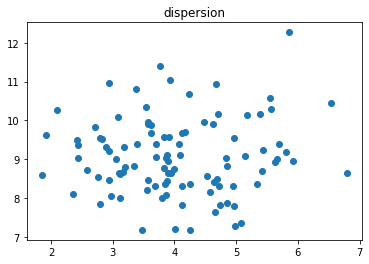

In [3]:
m = np.array([4,9])
def generer_echantillon(N,mean,cov):
    return np.random.multivariate_normal(mean=mean,cov=cov,size=N)

ech_dim2_1 = generer_echantillon(N,m,np.eye(2))
plt.scatter(ech_dim2_1[:,0], ech_dim2_1[:,1])
plt.title(label='dispersion')
plt.show()



$3.2)$

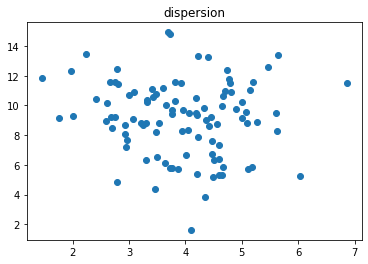

[3.9336563329526024, 9.150579376537259]
[[ 0.98077735 -0.25384366]
 [-0.25384366  6.2638349 ]]


In [4]:
variance = np.array([[1,0],[0,6]])

ech_dim2_2 = generer_echantillon(N,m,variance)
X = ech_dim2_2[:,0]
Y = ech_dim2_2[:,1]
plt.scatter(X,Y)
plt.title(label='dispersion')
plt.show()

print([np.mean(X),np.mean(Y)])
print(np.cov(ech_dim2_2.transpose()))

$3.3)$

On vérifie qu'il suffit de prendre une racine carrée de la matrice de covariance voulue pour la matrice U

$3.4)$

In [5]:
s = np.array([[2,2],[2,5]])
test = sqrtm(s)
print(test)
print(test @ test.transpose())
m_ = np.array([0,0])
echantillon3 = generer_echantillon(N,m_,np.eye(2))
X_ = np.array([test @ echantillon3[i] for i in range(len(echantillon3))])

X3 = X_[:,0]

Y3 = X_[:,1]

print([np.mean(X3),np.mean(Y3)])
print(np.cov(X_.T))

[[1.28989795 0.5797959 ]
 [0.5797959  2.15959179]]
[[2. 2.]
 [2. 5.]]
[0.08131720498620884, -0.0267922844981066]
[[2.11814359 2.47753909]
 [2.47753909 6.08576094]]


In [6]:
alpha = (1/2) * np.arctan(2*s[0,1]/(s[0,0]-s[1,1]))
print(np.diag((1,2,3)))
w, v = eig(np.diag((1, 2, 3)))
print(w)
print(v)
S_d, V = eig(s)
print(s)
print(V)
print(S_d)
S_d = np.diag(S_d)
print(V @ S_d @ V.T)

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[1. 2. 3.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[2 2]
 [2 5]]
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]
[1. 6.]
[[2. 2.]
 [2. 5.]]


$3.5)$

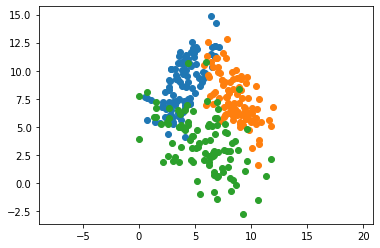

In [7]:
m1 = np.array([4,9])
m2 = np.array([8.5, 7.5])
m3 = np.array([6, 3.5])

s1 = np.array([[2,2],[2,5]])
s2 = np.array([[2, -2], [-2, 5]])
s3 = np.array([[7, -4], [-4, 7]])

x1 = generer_echantillon(N,m1,s1)
x2 = generer_echantillon(N,m2,s2)
x3 = generer_echantillon(N,m3,s3)

x1_1 = x1[:,0]
x1_2 = x1[:,1]

x2_1 = x2[:,0]
x2_2 = x2[:,1]

x3_1 = x3[:,0]
x3_2 = x3[:,1]

plt.scatter(x1_1,x1_2)
plt.scatter(x2_1,x2_2)
plt.scatter(x3_1,x3_2)
plt.axis('equal')
plt.show()

$4.1)$

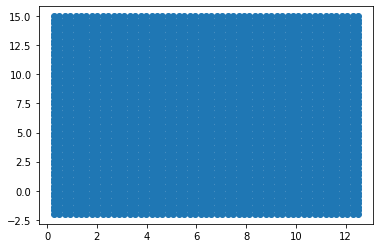

In [8]:
ligne1 = np.linspace(0.27,12.5,57)
ligne2 = np.linspace(-2,15,57)

Xi,Yj = np.meshgrid(ligne1,ligne2)
plt.scatter(Xi,Yj)
plt.show()

$4.2)$, $4.3)$

In [47]:
def generate_dens(m,s,X,Y):
    truc = np.stack((X,Y),axis=2)
    classe = multivariate_normal(m,s)
    dens = classe.pdf(truc)
    return dens

dens1 = generate_dens(m1,s1,Xi,Yj)
dens2 = generate_dens(m2,s2,Xi,Yj)
dens3 = generate_dens(m3,s3,Xi,Yj)

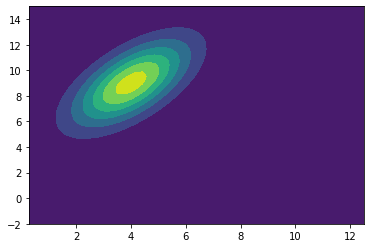

In [18]:
plt.contourf(Xi,Yj, dens1)
plt.show()

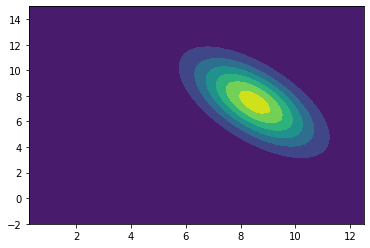

In [19]:
plt.contourf(Xi,Yj, dens2)
plt.show()

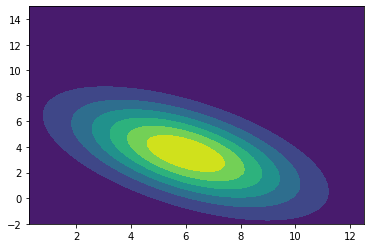

In [20]:
plt.contourf(Xi,Yj, dens3)
plt.show()

$4.4)$

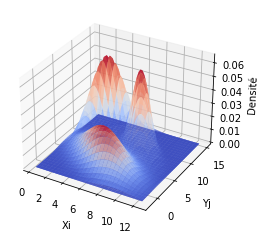

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ajout des trois lois conditionnelles à la figure
ax.plot_surface(Xi, Yj, dens1, cmap='coolwarm', alpha=0.7)
ax.plot_surface(Xi, Yj, dens2, cmap='coolwarm', alpha=0.7)
ax.plot_surface(Xi, Yj, dens3, cmap='coolwarm', alpha=0.7)

# Ajout de la légende
ax.set_xlabel('Xi')
ax.set_ylabel('Yj')
ax.set_zlabel('Densité')
#ax.legend(['Classe 1', 'Classe 2', 'Classe 3'])

# Affichage de la figure
plt.show()

In [51]:
Z = np.zeros_like(Xi)
for i in range(57):
    for j in range(57):
        list_dens = [dens1[i,j], dens2[i,j], dens3[i,j]]
        Z[i,j] = max(range(len(list_dens)), key = list_dens.__getitem__) + 1
#print(len(Xi))      

$5.1)$

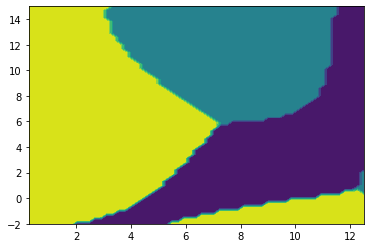

In [23]:
plt.contourf(Xi, Yj, Z.transpose() )
plt.show()

$6)$

In [52]:
df = pd.read_csv('voitures_t.txt', sep = ',', header = None)
df.columns = ['mpg', 'col2', 'col3', 'col4', 'weight', 'col5', 'col6', 'origin']

#On sépare les données par classe
usa_data = df[df['origin'] == 1][['mpg', 'weight']]
europe_data = df[df['origin'] == 2][['mpg', 'weight']]
asia_data = df[df['origin'] == 3][['mpg', 'weight']]

#On calcule les moyennes et convariance pour chaque classe
usa_mean = usa_data.mean().values
usa_cov = np.cov(usa_data.values.T)

europe_mean = europe_data.mean().values
europe_cov = np.cov(europe_data.values.T)

asia_mean = asia_data.mean().values
asia_cov = np.cov(asia_data.values.T)

# On créé une grille comme dans les questions précédentes, et les matrices de densité de probabilité
x, y = np.meshgrid(np.linspace(10, 45, 200), np.linspace(1500, 5500, 200))

dens_usa = generate_dens(usa_mean,usa_cov,x,y)
dens_europe = generate_dens(europe_mean,europe_cov,x,y)
dens_asia = generate_dens(asia_mean,asia_cov,x,y)


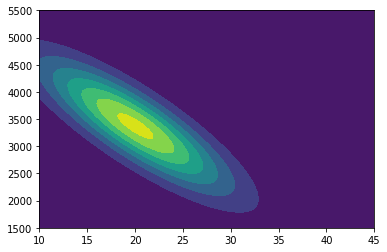

In [25]:
plt.contourf(x,y,dens_usa)
plt.show()

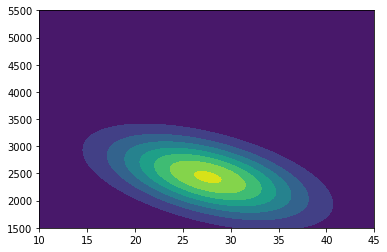

In [26]:
plt.contourf(x,y,dens_europe)
plt.show()

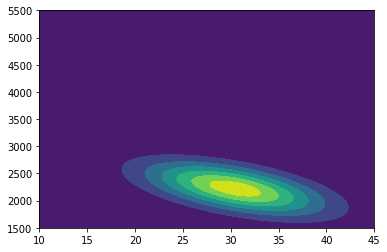

In [27]:
plt.contourf(x,y,dens_asia)
plt.show()

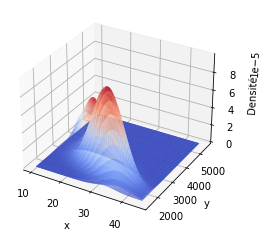

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ajout des trois lois conditionnelles à la figure
ax.plot_surface(x, y, dens_usa, cmap='coolwarm', alpha=0.7)
ax.plot_surface(x, y, dens_europe, cmap='coolwarm', alpha=0.7)
ax.plot_surface(x, y, dens_asia, cmap='coolwarm', alpha=0.7)

# Ajout de la légende
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Densité')
#ax.legend(['Classe 1', 'Classe 2', 'Classe 3'])

# Affichage de la figure
plt.show()

In [33]:
z = np.zeros_like(x)
for i in range(len(x)):
    for j in range(len(x)):
        list_dens = [dens_usa[i,j], dens_europe[i,j], dens_asia[i,j]]
        z[i,j] = max(range(len(list_dens)), key = list_dens.__getitem__) + 1

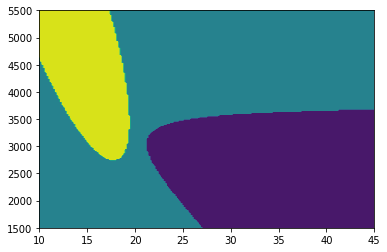

In [34]:
plt.contourf(x, y, z.transpose() )
plt.show()